In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
import pprint as pp
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import re

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 7)
rcParams['font.size'] = 20


In [2]:
data = pd.read_csv('user_with_sentiment.csv')

# LSA

Let's create a truncated SVD with 20 components since this describes nearly 85% of the variance. 

In [3]:
vectorizer = CountVectorizer( max_features = 40000, ngram_range=(1,2), min_df=5, max_df=0.4)
dtm = vectorizer.fit_transform(data.documents)

In [4]:
lsa = TruncatedSVD(30, algorithm='arpack')
dtm_lsa = lsa.fit_transform(dtm.asfptype())
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

# Doc 2 Vec Training

In [5]:
data.head(2)

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
0,511SFBay,today tomorrow day visit learn green commute ...,0.005019,0.312647,-0.273358,-0.217682
1,ABCPolitics,president trump threaten pull federal funding ...,0.073089,0.341123,0.033277,0.041240


In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data.documents)]

In [ ]:
max_epochs = 1000
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [63]:
model= Doc2Vec.load("d2v.model")


In [64]:
model.docvecs.similarity(66,5)

0.82388675

# Compare LSA to Doc2Vec

Now that we have trained our Doc2Vec algorithm as well as our LSA algorithm, let's see the results we get in comparing their respective similarities. 

In [45]:
data.head()

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
0,511SFBay,today tomorrow day visit learn green commute ...,0.005019,0.312647,-0.273358,-0.217682
1,ABCPolitics,president trump threaten pull federal funding ...,0.073089,0.341123,0.033277,0.041240
2,AdorabIeDog,dog rescue friend slip fall water dog rescue ...,0.141060,0.383278,0.219881,0.204117
3,AndrewYNg,apparently 20 year ago already contribute face...,0.198599,0.424465,0.315762,0.292330
4,BarackObama,veteran family thank tribute truly match magni...,0.140160,0.336449,0.215674,0.200571


In [46]:
lsa_sims = [cosine_similarity(np.asmatrix(dtm_lsa)[1],np.asmatrix(dtm_lsa)[i])for i in range(0,len(data))]


In [59]:
data.tail()

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
74,tim_cook,สว สด คร บชาวกร งเทพ thai customer store tea...,0.306566,0.482156,0.541148,0.494231
75,voxdotcom,yet see big piece evidence trump much empath...,0.069075,0.363659,-0.009115,0.006523
76,washingtonpost,attack starve century old diary recount u so...,0.034025,0.286189,-0.095734,-0.069782
77,wzchen,release dataset question sincerity run corresp...,0.184889,0.328562,0.267094,0.250653
78,ycombinator,conversation amazon cto werner vogel moderate ...,0.098576,0.217284,0.178381,0.162420


In [61]:
lsa_sims[20:30]

[array([[0.02393918]]),
 array([[0.11951312]]),
 array([[0.03399917]]),
 array([[0.19322516]]),
 array([[0.21819393]]),
 array([[0.0009726]]),
 array([[0.1995835]]),
 array([[0.5988257]]),
 array([[0.66666534]]),
 array([[0.29586579]])]

In [58]:
sorted(lsa_sims, reverse=True)

[array([[1.]]),
 array([[0.7297294]]),
 array([[0.70064965]]),
 array([[0.66666534]]),
 array([[0.6074215]]),
 array([[0.59996087]]),
 array([[0.5988257]]),
 array([[0.55425992]]),
 array([[0.53371209]]),
 array([[0.50800676]]),
 array([[0.31826023]]),
 array([[0.30651572]]),
 array([[0.29586579]]),
 array([[0.26828836]]),
 array([[0.24900846]]),
 array([[0.23600294]]),
 array([[0.2331303]]),
 array([[0.22577665]]),
 array([[0.21819393]]),
 array([[0.2007632]]),
 array([[0.1995835]]),
 array([[0.19322516]]),
 array([[0.18729889]]),
 array([[0.16917015]]),
 array([[0.16587437]]),
 array([[0.15062259]]),
 array([[0.15016967]]),
 array([[0.14278518]]),
 array([[0.13693082]]),
 array([[0.12079987]]),
 array([[0.11996196]]),
 array([[0.11951312]]),
 array([[0.11753021]]),
 array([[0.10331927]]),
 array([[0.09478229]]),
 array([[0.07592119]]),
 array([[0.07526539]]),
 array([[0.07241625]]),
 array([[0.06870861]]),
 array([[0.06391005]]),
 array([[0.06378805]]),
 array([[0.06109326]]),
 array

In [10]:
lsa_sims = [cosine_similarity(np.asmatrix(dtm_lsa)[1],np.asmatrix(dtm_lsa)[i])for i in [40,16, 28,65,76,16,2,10]]
doc2vec_sims = [model.docvecs.similarity(1, i) for i in range(0,79)]

In [11]:
np.array(doc2vec_sims).argsort()[-7:][::1]

array([28, 44, 49, 26, 68, 40,  1])

In [42]:
np.array(doc2vec_sims).argsort()[0:7]

array([ 7, 33, 20, 71, 13,  9,  4])

In [37]:
doc2vec_sims = [model.docvecs.similarity(49, i) for i in range(0,79)]

In [38]:
data.head()

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
0,511SFBay,today tomorrow day visit learn green commute ...,0.005019,0.312647,-0.273358,-0.217682
1,ABCPolitics,president trump threaten pull federal funding ...,0.073089,0.341123,0.033277,0.041240
2,AdorabIeDog,dog rescue friend slip fall water dog rescue ...,0.141060,0.383278,0.219881,0.204117
3,AndrewYNg,apparently 20 year ago already contribute face...,0.198599,0.424465,0.315762,0.292330
4,BarackObama,veteran family thank tribute truly match magni...,0.140160,0.336449,0.215674,0.200571


In [39]:
np.array(doc2vec_sims)

array([0.9029001 , 0.77956975, 0.6192051 , 0.6747613 , 0.5449426 ,
       0.7348848 , 0.64165384, 0.35856128, 0.7979608 , 0.5305665 ,
       0.86173123, 0.767712  , 0.74329805, 0.47159705, 0.7602583 ,
       0.8019368 , 0.84757096, 0.6093946 , 0.83356225, 0.7438589 ,
       0.4585169 , 0.5474657 , 0.74953806, 0.9298018 , 0.8530065 ,
       0.778268  , 0.79010665, 0.61197466, 0.81780607, 0.61365694,
       0.6498145 , 0.68514866, 0.74018383, 0.3828479 , 0.76451415,
       0.7675094 , 0.84802365, 0.7801556 , 0.76678103, 0.8722248 ,
       0.74777097, 0.80537945, 0.8528765 , 0.76564336, 0.7570099 ,
       0.8337442 , 0.85275227, 0.8909317 , 0.90009904, 1.        ,
       0.9159315 , 0.6633212 , 0.7974124 , 0.783824  , 0.84218127,
       0.8092483 , 0.91562086, 0.6314177 , 0.8638426 , 0.615533  ,
       0.8561782 , 0.79286915, 0.7555588 , 0.8866554 , 0.8379887 ,
       0.8003742 , 0.6912487 , 0.7300662 , 0.90771705, 0.8913954 ,
       0.8192739 , 0.46847522, 0.6182244 , 0.8400572 , 0.67480

In [40]:
data.iloc[np.array(doc2vec_sims).argsort()[-6:]]


,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
0,511SFBay,today tomorrow day visit learn green commute ...,0.005019,0.312647,-0.273358,-0.217682
68,sfchronicle,air another danger fire survivor butte county ...,0.088947,0.348106,0.031441,0.042942
56,fteconomics,week ahead single day powell walmart wall str...,0.029378,0.183336,-0.029790,-0.017956
50,data4democracy,dear internet feel read open source initiative...,0.141787,0.332241,0.191890,0.181870
23,JeffBezos,yep lucky expose tech cod young age inspire li...,0.264816,0.454217,0.477304,0.434806
49,chrisalbon,colleague endorse say highlight skill say k...,0.062657,0.266037,0.070086,0.068600


In [15]:
data.iloc[np.array(doc2vec_sims).argsort()[-7:][::1]]

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
28,NPR,light camera action video vixen hendrix stea...,0.073925,0.340474,-0.025933,-0.005961
44,UpshotNYT,txsen year beto rourke blue get 148k vote hill...,0.121879,0.406701,0.152963,0.146746
49,chrisalbon,colleague endorse say highlight skill say k...,0.062657,0.266037,0.070086,0.068600
26,Medium,glass block digital screen turn whatev device ...,0.081917,0.406497,0.034360,0.043872
68,sfchronicle,air another danger fire survivor butte county ...,0.088947,0.348106,0.031441,0.042942
40,TheAtlantic,ancestor carrot gnarl white root flowery plant...,0.077251,0.366507,0.024849,0.035329
1,ABCPolitics,president trump threaten pull federal funding ...,0.073089,0.341123,0.033277,0.041240


In [14]:
data.iloc[np.array(doc2vec_sims).argsort()[0:7][::1]]

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
20,HarvardHBS,join congratulate colleague win grant place ...,0.122919,0.321763,0.237178,0.214326
71,stat110,really like book spatial point pattern metho...,0.190641,0.401988,0.287484,0.268115
7,BillGates,share stage beaker poop china seriously toile...,0.222909,0.463673,0.399805,0.364426
51,dpatil,security like air know thank veteran put life ...,0.137108,0.372440,0.159240,0.154813
13,Dropbox,dropbox rise beat estimate revenue earning ...,0.185746,0.333141,0.348898,0.316267
57,github,fun fact 4 800 publicly accessible gov project...,0.097583,0.251243,0.183954,0.166680
17,Google,hmm let get connected google one expert plea...,0.105430,0.206924,0.364339,0.312557


It looks like LSA and Doc2Vec are giving very similar results.  They are very similar to nearly all of the other news media outlets, but differ much more in comparison to the cute doggo meme twitters.  

In [66]:
print (model.docvecs.most_similar(1))


[('40', 0.8301066756248474), ('68', 0.8004077672958374), ('26', 0.7802059650421143), ('49', 0.779569685459137), ('44', 0.7786017060279846), ('28', 0.7784062027931213), ('23', 0.7777433395385742), ('78', 0.7591701745986938), ('47', 0.7572511434555054), ('76', 0.7485241889953613)]


In [67]:
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 10000)
X = kmeans.fit(model.docvecs.doctag_syn0)
labels = kmeans.labels_.tolist()


l = kmeans.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
point = pca.transform(model.docvecs.doctag_syn0)

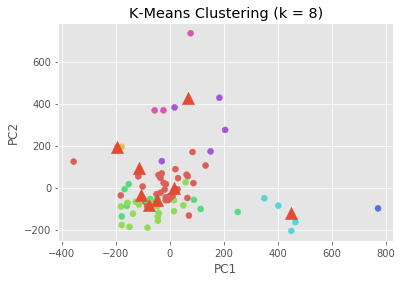

In [68]:
label_colors = sns.color_palette("hls", 8)
color = [label_colors[i] for i in labels]
plt.scatter(point[:, 0], point[:, 1], c = color)

centroids = kmeans.cluster_centers_
centroid = pca.transform(centroids)
plt.scatter(centroid[:, 0], centroid[:, 1], marker='^', s=150)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (k = 8)')
plt.show()


In [267]:
import tweepy
import cnfg
from tqdm import tqdm
from nltk.corpus import stopwords

config = cnfg.load(".twitter_config")

auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])
auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

api=tweepy.API(auth)

In [351]:
tweet_dict_list = []
tweets = tweepy.Cursor(api.user_timeline,\
                       screen_name='JoeBiden', tweet_mode='extended').items()
for t in tqdm(tweets):
    d = {}
    d['full_text'] = t.full_text
    d['screen_name'] = t.user.screen_name
        
    tweet_dict_list.append(d)


1501it [00:10, 146.96it/s]


In [352]:
def preprocessor(text):
    text = re.sub('@[A-Za-z0-9]+', '', text)
    text = re.sub('https?://[A-Za-z0-9./]+', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()))
    return text + ' '

In [353]:
test_df = pd.DataFrame(tweet_dict_list)


In [354]:
test_df['filtered_tweets'] = test_df.full_text.apply(preprocessor)

In [355]:
import spacy
nlp = spacy.load('en')
stop = stopwords.words('english')
stop.append('rt')
stop.append('amp')

In [356]:
def lemmatize(tweet):
    #only return lemmatized version of word if not in stopwords
    return ' '.join([word.lemma_ for word in nlp(tweet) if str(word) not in stop])

In [357]:
test_df['lemmatized'] = test_df.filtered_tweets.apply(lemmatize)

In [358]:
test_user_df =  test_df.groupby('screen_name').lemmatized.sum()

In [359]:
test_user_df.columns = ['documents']

In [360]:
test_user_df= test_user_df.apply(lambda x: str(x).replace('-PRON-', ''))

In [365]:
test_data = word_tokenize(test_user_df.values[0])
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar(4)


V1_infer [ 30.222328   -2.267686  -26.961166   -6.93132    44.17862    53.29243
  10.2984915  29.92831     6.0922832 -11.099875  -13.108197   15.428094
 -32.50573    27.642263  -11.899669   -1.6023028 -23.022455   53.178474
  39.509468  -43.613953 ]
[('76', 0.6422384977340698), ('7', 0.6161287426948547), ('18', 0.6117703914642334), ('24', 0.5830065011978149), ('73', 0.5643200874328613), ('35', 0.5557702779769897), ('56', 0.5512829422950745), ('69', 0.549140453338623), ('43', 0.5473175048828125), ('42', 0.546343207359314)]


In [362]:
arr = np.dot(v1,model.docvecs.doctag_syn0.T)
arr.argsort()[-5:][::1]

array([ 6, 54, 10, 17,  5])

In [394]:
model.docvecs.doctag_syn0[0]

array([  86.10771   ,  -40.158665  ,  -47.118996  ,   27.2679    ,
         63.258884  ,  126.68082   ,  -70.38445   ,   98.54703   ,
         90.64168   ,    0.61647344,  -47.26973   ,  149.50768   ,
       -200.88237   ,   88.97751   ,  104.48781   ,   37.472267  ,
       -197.55978   ,  154.55504   ,  193.16972   , -205.46513   ],
      dtype=float32)

In [406]:
data.iloc[17]

screen_name                                                         Google
documents                  hmm let get connected google one expert plea...
textblob_polarity                                                  0.10543
textblob_subjectivity                                             0.206924
vader_polarity                                                    0.364339
grouped_sentiment                                                 0.312557
Name: 17, dtype: object

In [ ]:
model.docvecs.doc

In [414]:
biden_sims = [cosine_similarity(model.docvecs.doctag_syn0[i].reshape(1,-1),v1.reshape(1,-1)) for i in range(0,79)]

In [442]:
data.iloc[-33]

screen_name                                                        WSJecon
documents                split congress several issue wrangle include u...
textblob_polarity                                                0.0700652
textblob_subjectivity                                              0.29025
vader_polarity                                                   0.0559146
grouped_sentiment                                                0.0587447
Name: 46, dtype: object

In [ ]:
biden_sims

In [440]:
biden_sims[-33]

array([[0.8880726]], dtype=float32)

In [424]:
biden_sims[-11]

array([[0.9041705]], dtype=float32)

In [390]:
np.dot(v1,model.docvecs.doctag_syn0.T)

array([56063.19 , 59236.31 , 69923.59 , 55794.977, 50863.86 , 78485.47 ,
       65819.33 , 40622.32 , 58068.92 , 49906.42 , 70638.21 , 57330.914,
       74557.97 , 59709.6  , 65151.492, 64409.312, 72170.25 , 64408.54 ,
       61479.04 , 68457.42 , 50719.4  , 45998.977, 67695.36 , 50255.887,
       54484.28 , 58877.445, 66695.8  , 52617.22 , 52731.363, 64464.902,
       54220.047, 70767.33 , 56810.188, 56828.137, 59902.215, 55999.562,
       70761.58 , 63045.586, 61701.45 , 75175.56 , 50758.223, 66144.55 ,
       65270.137, 60022.54 , 59318.68 , 61619.207, 63329.043, 52510.5  ,
       61430.527, 52754.54 , 61790.406, 54309.406, 68504.4  , 55633.684,
       74177.04 , 70375.75 , 70960.08 , 67035.08 , 63878.125, 54829.785,
       65794.195, 69038.92 , 54169.848, 64426.164, 58189.85 , 75428.19 ,
       63921.336, 53087.18 , 55368.95 , 64875.773, 66576.625, 53463.547,
       51954.656, 69298.83 , 63720.727, 73149.3  , 64610.5  , 66652.04 ,
       66193.64 ], dtype=float32)

In [364]:
data.iloc[arr.argsort()[-7:][::1]]

,screen_name,documents,textblob_polarity,textblob_subjectivity,vader_polarity,grouped_sentiment
39,TechCrunch,nest online estate agent make home seller chai...,0.077255,0.253428,0.083364,0.082142
60,kaggle,week kernelaward winner use 2018 kaggle machin...,0.161701,0.343893,0.271860,0.249828
6,BetoORourke,want say thank everyone make possible everyone...,0.141198,0.330936,0.261334,0.237307
54,espn,14 game win streak snap cal beat usc first tim...,0.082319,0.259345,0.116816,0.109917
10,CuteEmergency,cuteness overload mywinterfell siberian_huskie...,0.104839,0.236653,0.147562,0.139018
17,Google,hmm let get connected google one expert plea...,0.105430,0.206924,0.364339,0.312557
5,BernieSanders,difficult may seem today must never lose hope ...,0.111212,0.366544,0.130383,0.126549
